In [8]:
import flylib as flb
#from thllib import flylib as flb
import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
from flylib import util
import figurefirst as fifi
import scipy.signal
#import local_project_functions as lpf
from IPython.display import SVG,display
import pandas as pd

import flylib as flb
#from thllib import flylib as flb
import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
from flylib import util
import figurefirst as fifi
import scipy.signal
#import local_project_functions as lpf
from IPython.display import SVG,display
import pandas as pd
import networkx as nx

In [9]:
import networkx as nx

In [10]:


#fly_nums = range(1600, 1608) + range(1609, 1611) + range(1613, 1614) + range(1615, 1617) + range(1617, 1618) + range(1619, 1620) 
#fly_nums = range(1600, 1608) + range(1609, 1611) + range(1613, 1614) + range(1615, 1617) + range(1617, 1618) + range(1619, 1620) 
fly_nums = list(range(1389,1402))



multi_fly_df = util.construct_multi_fly_df(fly_nums)

all_stim_df = multi_fly_df


Making dataframe for fly number 1389
Making dataframe for fly number 1390
Making dataframe for fly number 1391
Making dataframe for fly number 1392
Making dataframe for fly number 1393
Making dataframe for fly number 1394
Making dataframe for fly number 1395
Making dataframe for fly number 1396
Making dataframe for fly number 1397
Making dataframe for fly number 1398
Making dataframe for fly number 1399
Making dataframe for fly number 1400
Making dataframe for fly number 1401


In [11]:
print(multi_fly_df.columns.values)
print(np.unique(multi_fly_df['stimulus']))

idx = (multi_fly_df['stimulus']=='cl_blocks, g_x=-1, g_y=0, b_x=-8, b_y=0, ch=True')& \
        ((multi_fly_df['amp_diff']>0.1)&(multi_fly_df['amp_diff']<0.104))


# double_filtered_df = multi_fly_df.loc[idx]
# print(double_filtered_df)

['t' 'stimulus' 'amp_diff' 'left_amp' 'right_amp' 'fly_num' 'wbf'
 'experimental_condition' 'pr_left' 'tpd_left' 'nm_left' 'iii1_left'
 'iii3_left' 'i2_left' 'hg2_left' 'hg3_left' 'hg1_left' 'i1_left'
 'bkg_left' 'b1_left' 'b2_left' 'b3_left' 'iii24_left' 'hg4_left'
 'pr_right' 'tpd_right' 'nm_right' 'iii1_right' 'iii3_right' 'i2_right'
 'hg2_right' 'hg3_right' 'hg1_right' 'i1_right' 'bkg_right' 'b1_right'
 'b2_right' 'b3_right' 'iii24_right' 'hg4_right']
['cl_blocks, g_x=-1, g_y=-4 b_x=-8, b_y=0'
 'cl_blocks, g_x=-1, g_y=-4 b_x=0, b_y=0'
 'cl_blocks, g_x=-1, g_y=-4 b_x=8, b_y=0'
 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0'
 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'
 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0'
 'cl_blocks, g_x=-1, g_y=4 b_x=-8, b_y=0'
 'cl_blocks, g_x=-1, g_y=4 b_x=0, b_y=0'
 'cl_blocks, g_x=-1, g_y=4 b_x=8, b_y=0'
 'ol_blocks, g_x=-12, g_y=0 b_x=0, b_y=0'
 'ol_blocks, g_x=0, g_y=-4 b_x=0, b_y=0'
 'ol_blocks, g_x=0, g_y=0 b_x=0, b_y=0'
 'ol_blocks, g_x=0, g_y=4 b_x=0, b_y=0'
 '

In [12]:
#print(filtered_df[key+'_right'])

#flynumbers = list(range(1389,1402))
#flynumbers = list(range(1548,1549))
#flylist = [flb.NetFly(fnum,rootpath='/media/imager/FlyDataD/FlyDB/') for fnum in flynumbers]
#l = [fly.open_signals() for fly in flylist]
#fly = flylist[4]
#fly.open_signals()
fly = flb.NetFly(1556)
fly.open_signals()

general_sorted_keys = sorted(fly.ca_cam_left_model_fits.keys())
#print(sorted(fly.ca_cam_left_model_fits.keys()))

sorted_keys = []

for key in general_sorted_keys:
    key2= key+'_right'
    key3= key+'_left'
    sorted_keys.append(key2)
    sorted_keys.append(key3)
    
    
print(sorted_keys)

['b1_right', 'b1_left', 'b2_right', 'b2_left', 'b3_right', 'b3_left', 'bkg_right', 'bkg_left', 'hg1_right', 'hg1_left', 'hg2_right', 'hg2_left', 'hg3_right', 'hg3_left', 'hg4_right', 'hg4_left', 'i1_right', 'i1_left', 'i2_right', 'i2_left', 'iii1_right', 'iii1_left', 'iii24_right', 'iii24_left', 'iii3_right', 'iii3_left', 'nm_right', 'nm_left', 'pr_right', 'pr_left', 'tpd_right', 'tpd_left']


yaw_left= multi_fly_df.loc[multi_fly_df['stimulus']== 'yaw_left, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'] 
yaw_right= multi_fly_df.loc[multi_fly_df['stimulus']== 'yaw_right, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'] 
pitch_up =  multi_fly_df.loc[multi_fly_df['stimulus']== 'roll_clockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'] 
pitch_down =  multi_fly_df.loc[multi_fly_df['stimulus']== 'roll_counterclockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'] 
roll_cw =  multi_fly_df.loc[multi_fly_df['stimulus']== 'pitch_up_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'] 
roll_ccw =  multi_fly_df.loc[multi_fly_df['stimulus']== 'pitch_down_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']
ol_stripe_left = multi_fly_df.loc[multi_fly_df['stimulus']== 'ol_stripe, g_x=-70, g_y=0, b_x=0, b_y=0, ch=0']
ol_stripe_right = multi_fly_df.loc[multi_fly_df['stimulus']== 'ol_stripe, g_x=70, g_y=0, b_x=0, b_y=0, ch=0']
stripe_fix = multi_fly_df.loc[multi_fly_df['stimulus']== 'pretrial_stripe_fix']



'cl_blocks, g_x=-1, g_y=-4 b_x=-8, b_y=0'
 'cl_blocks, g_x=-1, g_y=-4 b_x=0, b_y=0'
 'cl_blocks, g_x=-1, g_y=-4 b_x=8, b_y=0'
 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0'
 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'
 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0'
 'cl_blocks, g_x=-1, g_y=4 b_x=-8, b_y=0'
 'cl_blocks, g_x=-1, g_y=4 b_x=0, b_y=0'
 'cl_blocks, g_x=-1, g_y=4 b_x=8, b_y=0'
 'ol_blocks, g_x=-12, g_y=0 b_x=0, b_y=0'
 'ol_blocks, g_x=0, g_y=-4 b_x=0, b_y=0'
 'ol_blocks, g_x=0, g_y=0 b_x=0, b_y=0'
 'ol_blocks, g_x=0, g_y=4 b_x=0, b_y=0'
 'ol_blocks, g_x=12, g_y=0 b_x=0, b_y=0'
 'ol_stripe, g_x=-70, g_y=0 b_x=0, b_y=0'
 'ol_stripe, g_x=70, g_y=0 b_x=0, b_y=0' 'pretrial_stripe_fix'
 'trials_ended'




In [14]:
turn_left = multi_fly_df.loc[multi_fly_df['stimulus']== 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0']
turn_right = multi_fly_df.loc[multi_fly_df['stimulus']== 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0']
WSA_increase = multi_fly_df.loc[multi_fly_df['stimulus']== 'ol_blocks, g_x=0, g_y=4 b_x=0, b_y=0']
WSA_decrease = multi_fly_df.loc[multi_fly_df['stimulus']== 'ol_blocks, g_x=0, g_y=-4 b_x=0, b_y=0']

#yaw_left= multi_fly_df.loc[multi_fly_df['stimulus']== 'yaw_left, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'] 
#yaw_right= multi_fly_df.loc[multi_fly_df['stimulus']== 'yaw_right, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'] 
#pitch_up =  multi_fly_df.loc[multi_fly_df['stimulus']== 'roll_clockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'] 
#pitch_down =  multi_fly_df.loc[multi_fly_df['stimulus']== 'roll_counterclockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'] 
#roll_cw =  multi_fly_df.loc[multi_fly_df['stimulus']== 'pitch_up_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'] 
#roll_ccw =  multi_fly_df.loc[multi_fly_df['stimulus']== 'pitch_down_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']
#ol_stripe_left = multi_fly_df.loc[multi_fly_df['stimulus']== 'ol_stripe, g_x=-70, g_y=0, b_x=0, b_y=0, ch=0']
#ol_stripe_right = multi_fly_df.loc[multi_fly_df['stimulus']== 'ol_stripe, g_x=70, g_y=0, b_x=0, b_y=0, ch=0']
#stripe_fix = multi_fly_df.loc[multi_fly_df['stimulus']== 'pretrial_stripe_fix']


In [15]:
import pandas as pd
from collections import OrderedDict
from datetime import date

In [16]:
pitch_down_WS_decrease = pitch_down.loc[((pitch_down['experimental_condition']=='condition=test'))]

pitch_up_WS_increase = pitch_up.loc[((pitch_up['experimental_condition']=='condition=test'))]

roll_cw_right_increase = roll_cw.loc[((roll_cw['experimental_condition']=='condition=test'))]

roll_ccw_left_increase = roll_ccw.loc[((roll_ccw['experimental_condition']=='condition=test'))]

yaw_right_right_increase = yaw_right.loc[((yaw_right['experimental_condition']=='condition=test'))]

yaw_left_left_increase = yaw_left.loc[((yaw_left['experimental_condition']=='condition=test'))]

In [18]:
turn_left.head()

,t,stimulus,amp_diff,left_amp,right_amp,fly_num,wbf,experimental_condition,pr_left,tpd_left,...,hg2_right,hg3_right,hg1_right,i1_right,bkg_right,b1_right,b2_right,b3_right,iii24_right,hg4_right
4291,85.821814,"cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0",0.259057,1.113822,0.854764,1389,196.5,condition=baseline,2.353217,1.847417,...,13.217520,0.0,8.638967,3.367114,31.649204,5.551908,0.609672,10.314173,1.345080,2.325033
4292,85.841815,"cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0",NaN,NaN,0.881334,1389,196.5,condition=baseline,2.340178,1.837865,...,13.242991,0.0,9.141731,3.340759,31.620682,5.624682,0.572844,10.237155,0.791526,2.482936
4293,85.861815,"cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0",NaN,NaN,0.881334,1389,196.5,condition=baseline,2.340178,1.837865,...,13.242991,0.0,9.141731,3.340759,31.620682,5.624682,0.572844,10.237155,0.791526,2.482936
4294,85.881816,"cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0",0.225845,1.113822,0.887977,1389,196.5,condition=baseline,2.324724,1.847873,...,13.039302,0.0,8.691837,3.224332,31.643182,5.629723,0.585628,10.231885,0.539328,2.294296
4295,85.901816,"cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0",0.225845,1.113822,0.887977,1389,196.0,condition=baseline,2.324724,1.847873,...,13.039302,0.0,8.691837,3.224332,31.643182,5.629723,0.585628,10.231885,0.539328,2.294296


In [11]:
#print(yaw_left.index[6602])
#print(yaw_left.index[6603])

In [31]:
y = turn_left.index.tolist()
#y_der = (np.asarray(y)).diff()

slope = np.gradient(np.asarray(y))
slope = slope.flatten()
new_trial_inds =np.argwhere(slope>1.)
new_trial_inds
new_trial_inds_shifted = new_trial_inds -1
len(new_trial_inds)

150

In [32]:
#new_trial_inds
#new_trial_inds_shifted

In [33]:
new_trial_inds = new_trial_inds.flatten()
new_trial_inds_shifted = new_trial_inds_shifted.flatten()

In [34]:
counter = 0
turn_left['trial'] = ""
for trial_ind in new_trial_inds: 
    if counter == 0:
        turn_left['trial'][0:trial_ind] = counter
    else: 
        turn_left['trial'][new_trial_inds[counter-1]: trial_ind] = counter
    counter += 1
    

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [35]:
counter = 0
turn_left['trial'] = ""
for trial_ind in new_trial_inds_shifted: 
    if counter == 0:
        turn_left['trial'][0:trial_ind] = counter
    else: 
        turn_left['trial'][new_trial_inds_shifted[counter-1]: trial_ind] = counter
    counter += 1
    

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [69]:
#d = pd.DataFrame()
main_df = pd.DataFrame()
dfe= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = turn_left.loc[(turn_left['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['amp_diff']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 450:
            main_df[counter] = ee
        if len(ee) >= 450:
            main_df[counter] = ee[0:450]
        else:
            for i in range(450-len(ee)):
                ee.append(0)
            main_df[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1
    
#df_big_force['impact force (mN)'].iloc[3]
#df.loc[42, :]
#df.loc[date & trial & ID, :].iloc[0]

In [70]:
main_df.head()

,0,2,4,6,8,10,12,14,16,18,...,130,132,134,136,138,140,142,144,146,148
0,0.259057,NaN,0.225845,-0.112922,0.252415,-0.345410,-0.192632,-0.205917,0.019927,NaN,...,-0.339907,-0.482050,-0.364628,-0.358448,-0.358448,-0.333727,-0.074162,0.018540,-0.253386,-0.173044
1,NaN,NaN,-0.139492,0.365337,0.199275,0.431762,0.179347,0.146135,0.146135,NaN,...,-0.241025,0.284286,-0.055621,0.241025,-0.067981,0.296646,0.333727,0.185404,-0.309007,NaN
2,NaN,NaN,-0.139492,0.338767,0.199275,0.478260,0.179347,0.159420,0.172705,NaN,...,-0.234845,0.333727,-0.012360,0.234845,-0.061801,0.296646,0.364628,0.197764,-0.364628,NaN
3,0.225845,NaN,-0.132850,0.338767,0.146135,0.531400,0.179347,0.205917,0.132850,0.37198,...,-0.234845,0.333727,-0.030901,0.222485,-0.067981,0.259566,0.346088,0.197764,-0.364628,NaN
4,0.225845,NaN,-0.132850,0.332125,0.073067,0.531400,0.179347,0.205917,0.172705,NaN,...,-0.265746,0.290466,0.006180,0.216305,-0.061801,0.309007,0.346088,0.197764,-0.376988,NaN


In [73]:
from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBA = np.mean(main_df, axis =1)  #mean
#error = main_df.stack().std()  
error = main_df.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 450)
time =inds/50

In [33]:
#mean_WBA[35:65]
#mean_WBA[65:110]


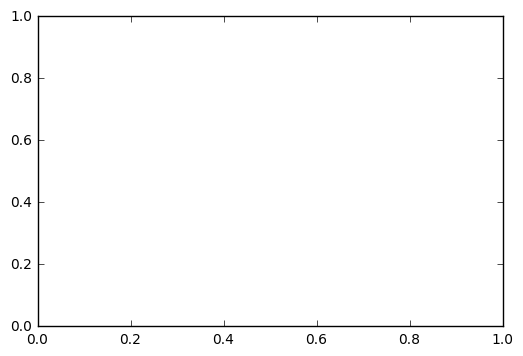

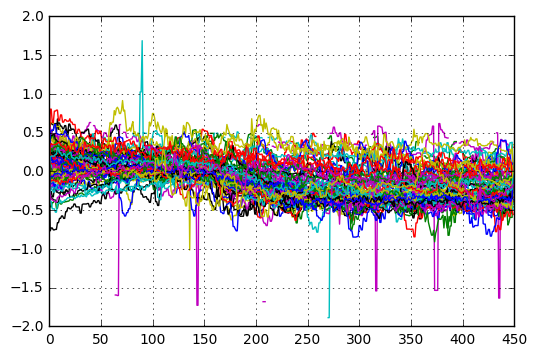

In [74]:
len(mean_WBA )

fig, ax = plt.subplots()
ax.plot(time, mean_WBA)

for col in main_df.columns:
    ax.plot(inds, main_df[col])

#ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#       title='About as simple as it gets, folks')
ax.grid()

#fig.savefig("test.png")
plt.show()

In [ ]:
y2 = turn_right.index.tolist()
#y_der = (np.asarray(y)).diff()

slope = np.gradient(np.asarray(y2))
slope = slope.flatten()
new_trial_inds =np.argwhere(slope>1.)
new_trial_inds
new_trial_inds_shifted = new_trial_inds -1
len(new_trial_inds)

new_trial_inds = new_trial_inds.flatten()
new_trial_inds_shifted = new_trial_inds_shifted.flatten()

counter = 0
turn_right['trial'] = ""
for trial_ind in new_trial_inds_shifted: 
    if counter == 0:
        turn_right['trial'][0:trial_ind] = counter
    else: 
        turn_right['trial'][new_trial_inds_shifted[counter-1]: trial_ind] = counter
    counter += 1

#d = pd.DataFrame()
main_df_turn_right = pd.DataFrame()
dfe_turn_right= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = turn_right.loc[(turn_right['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['amp_diff']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 450:
            main_df_turn_right[counter] = ee
        if len(ee) >= 450:
            main_df_turn_right[counter] = ee[0:450]
        else:
            for i in range(450-len(ee)):
                ee.append(0)
            main_df_turn_right[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1

    
    
#df_big_force['impact force (mN)'].iloc[3]
#df.loc[42, :]
#df.loc[date & trial & ID, :].iloc[0]

from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBA_turn_right = np.mean(main_df_turn_right, axis =1)  #mean
#error = main_df.stack().std()  
error_turn_right = main_df_turn_right.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 450)
time =inds/50

In [76]:
y2 = pitch_up.index.tolist()
#y_der = (np.asarray(y)).diff()

slope = np.gradient(np.asarray(y2))
slope = slope.flatten()
new_trial_inds =np.argwhere(slope>1.)
new_trial_inds
new_trial_inds_shifted = new_trial_inds -1
len(new_trial_inds)

new_trial_inds = new_trial_inds.flatten()
new_trial_inds_shifted = new_trial_inds_shifted.flatten()

counter = 0
pitch_up['trial'] = ""
for trial_ind in new_trial_inds_shifted: 
    if counter == 0:
        pitch_up['trial'][0:trial_ind] = counter
    else: 
        pitch_up['trial'][new_trial_inds_shifted[counter-1]: trial_ind] = counter
    counter += 1

#d = pd.DataFrame()
main_df_pitch_up = pd.DataFrame()
dfe_pitch_up= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = pitch_up.loc[(pitch_up['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['amp_diff']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 550:
            main_df_pitch_up[counter] = ee
        else:
            for i in range(550-len(ee)):
                ee.append(0)
            main_df_pitch_up[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1

    
    
#df_big_force['impact force (mN)'].iloc[3]
#df.loc[42, :]
#df.loc[date & trial & ID, :].iloc[0]

from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBA_pitch_up = np.mean(main_df_pitch_up, axis =1)  #mean
#error = main_df.stack().std()  
error_pitch_up = main_df_pitch_up.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 550)
time =inds/50.

ValueError: Shape of array too small to calculate a numerical gradient, at least two elements are required.

In [43]:
y2 = pitch_down.index.tolist()
#y_der = (np.asarray(y)).diff()

slope = np.gradient(np.asarray(y2))
slope = slope.flatten()
new_trial_inds =np.argwhere(slope>1.)
new_trial_inds
new_trial_inds_shifted = new_trial_inds -1
len(new_trial_inds)

new_trial_inds = new_trial_inds.flatten()
new_trial_inds_shifted = new_trial_inds_shifted.flatten()

counter = 0
pitch_down['trial'] = ""
for trial_ind in new_trial_inds_shifted: 
    if counter == 0:
        pitch_down['trial'][0:trial_ind] = counter
    else: 
        pitch_down['trial'][new_trial_inds_shifted[counter-1]: trial_ind] = counter
    counter += 1

#d = pd.DataFrame()
main_df_pitch_down = pd.DataFrame()
dfe_pitch_down= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = pitch_down.loc[(pitch_down['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['amp_diff']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 550:
            main_df_pitch_down[counter] = ee
        else:
            for i in range(550-len(ee)):
                ee.append(0)
            main_df_pitch_down[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1

    
    
#df_big_force['impact force (mN)'].iloc[3]
#df.loc[42, :]
#df.loc[date & trial & ID, :].iloc[0]

from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBA_pitch_down = np.mean(main_df_pitch_down, axis =1)  #mean
#error = main_df.stack().std()  
error_pitch_down = main_df_pitch_down.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 550)
time =inds/50

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [44]:
y2 = roll_cw.index.tolist()
#y_der = (np.asarray(y)).diff()

slope = np.gradient(np.asarray(y2))
slope = slope.flatten()
new_trial_inds =np.argwhere(slope>1.)
new_trial_inds
new_trial_inds_shifted = new_trial_inds -1
len(new_trial_inds)

new_trial_inds = new_trial_inds.flatten()
new_trial_inds_shifted = new_trial_inds_shifted.flatten()

counter = 0
roll_cw['trial'] = ""
for trial_ind in new_trial_inds_shifted: 
    if counter == 0:
        roll_cw['trial'][0:trial_ind] = counter
    else: 
        roll_cw['trial'][new_trial_inds_shifted[counter-1]: trial_ind] = counter
    counter += 1

#d = pd.DataFrame()
main_df_roll_cw = pd.DataFrame()
dfe_roll_cw= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = roll_cw.loc[(roll_cw['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['amp_diff']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 550:
            main_df_roll_cw[counter] = ee
        else:
            for i in range(550-len(ee)):
                ee.append(0)
            main_df_roll_cw[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1

    
    
#df_big_force['impact force (mN)'].iloc[3]
#df.loc[42, :]
#df.loc[date & trial & ID, :].iloc[0]

from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBA_roll_cw = np.mean(main_df_roll_cw, axis =1)  #mean
#error = main_df.stack().std()  
error_roll_cw = main_df_roll_cw.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 550)
time =inds/50.

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [50]:
y2 = roll_ccw.index.tolist()
#y_der = (np.asarray(y)).diff()

slope = np.gradient(np.asarray(y2))
slope = slope.flatten()
new_trial_inds =np.argwhere(slope>1.)
new_trial_inds
new_trial_inds_shifted = new_trial_inds -1
len(new_trial_inds)

new_trial_inds = new_trial_inds.flatten()
new_trial_inds_shifted = new_trial_inds_shifted.flatten()

counter = 0
roll_ccw['trial'] = ""
for trial_ind in new_trial_inds_shifted: 
    if counter == 0:
        roll_ccw['trial'][0:trial_ind] = counter
    else: 
        roll_ccw['trial'][new_trial_inds_shifted[counter-1]: trial_ind] = counter
    counter += 1

#d = pd.DataFrame()
main_df_roll_ccw = pd.DataFrame()
dfe_roll_ccw= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = roll_ccw.loc[(roll_ccw['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['amp_diff']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 550:
            main_df_roll_ccw[counter] = ee
        if len(ee) > 600:
            main_df_roll_ccw[counter]= ee[0:550]
        else:
            for i in range(550-len(ee)):
                ee.append(0)
            #print(len(ee))
            main_df_roll_ccw[counter] = ee
            
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1

    
    
#df_big_force['impact force (mN)'].iloc[3]
#df.loc[42, :]
#df.loc[date & trial & ID, :].iloc[0]

from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBA_roll_ccw = np.mean(main_df_roll_ccw, axis =1)  #mean
#error = main_df.stack().std()  
error_roll_ccw = main_df_roll_ccw.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 550)
time =inds/50

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550


/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [52]:
time =inds/50.

In [61]:
#### Now WBF


#d = pd.DataFrame()
WBF_df_yaw_right = pd.DataFrame()
dfe_yaw_right= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = yaw_right.loc[(yaw_right['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['wbf']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 550:
            WBF_df_yaw_right[counter] = ee
        else:
            for i in range(550-len(ee)):
                ee.append(0)
            WBF_df_yaw_right[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1



from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBF_yaw_right = np.mean(WBF_df_yaw_right, axis =1)  #mean
#error = main_df.stack().std()  
error_WBF_yaw_right = WBF_df_yaw_right.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 550)
time =inds/50

In [62]:
#### Now WBF


#d = pd.DataFrame()
WBF_df_yaw_left = pd.DataFrame()
dfe_yaw_left= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = yaw_left.loc[(yaw_left['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['wbf']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 550:
            WBF_df_yaw_left[counter] = ee
        else:
            for i in range(550-len(ee)):
                ee.append(0)
            WBF_df_yaw_left[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1



from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBF_yaw_left = np.mean(WBF_df_yaw_left, axis =1)  #mean
#error = main_df.stack().std()  
error_WBF_yaw_left = WBF_df_yaw_left.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 550)
time =inds/50

In [63]:
#### Now WBF


#d = pd.DataFrame()
WBF_df_pitch_up = pd.DataFrame()
dfe_pitch_up= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = pitch_up.loc[(pitch_up['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['wbf']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 550:
            WBF_df_pitch_up[counter] = ee
        else:
            for i in range(550-len(ee)):
                ee.append(0)
            WBF_df_pitch_up[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1



from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBF_pitch_up = np.mean(WBF_df_pitch_up, axis =1)  #mean
#error = main_df.stack().std()  
error_WBF_pitch_up = WBF_df_pitch_up.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 550)
time =inds/50

In [64]:
#### Now WBF


#d = pd.DataFrame()
WBF_df_pitch_down = pd.DataFrame()
dfe_pitch_down= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = pitch_down.loc[(pitch_down['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['wbf']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 550:
            WBF_df_pitch_down[counter] = ee
        else:
            for i in range(550-len(ee)):
                ee.append(0)
            WBF_df_pitch_down[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1



from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBF_pitch_down = np.mean(WBF_df_pitch_down, axis =1)  #mean
#error = main_df.stack().std()  
error_WBF_pitch_down = WBF_df_pitch_down.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 550)
time =inds/50

In [65]:
#### Now WBF


#d = pd.DataFrame()
WBF_df_roll_cw = pd.DataFrame()
dfe_roll_cw= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = roll_cw.loc[(roll_cw['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['wbf']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 550:
            WBF_df_roll_cw[counter] = ee
        else:
            for i in range(550-len(ee)):
                ee.append(0)
            WBF_df_roll_cw[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1



from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBF_roll_cw = np.mean(WBF_df_roll_cw, axis =1)  #mean
#error = main_df.stack().std()  
error_WBF_roll_cw = WBF_df_roll_cw.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 550)
time =inds/50

In [67]:
#### Now WBF


#d = pd.DataFrame()
WBF_df_roll_ccw = pd.DataFrame()
dfe_roll_ccw= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = roll_ccw.loc[(roll_ccw['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['wbf']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 550:
            WBF_df_roll_ccw[counter] = ee
        if len(ee) > 600:
            WBF_df_roll_ccw[counter]= ee[0:550]
        else:
            for i in range(550-len(ee)):
                ee.append(0)
            WBF_df_roll_ccw[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1



from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBF_roll_ccw = np.mean(WBF_df_roll_ccw, axis =1)  #mean
#error = main_df.stack().std()  
error_WBF_roll_ccw = WBF_df_roll_ccw.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 550)
time =inds/50

In [69]:
time =inds/50.

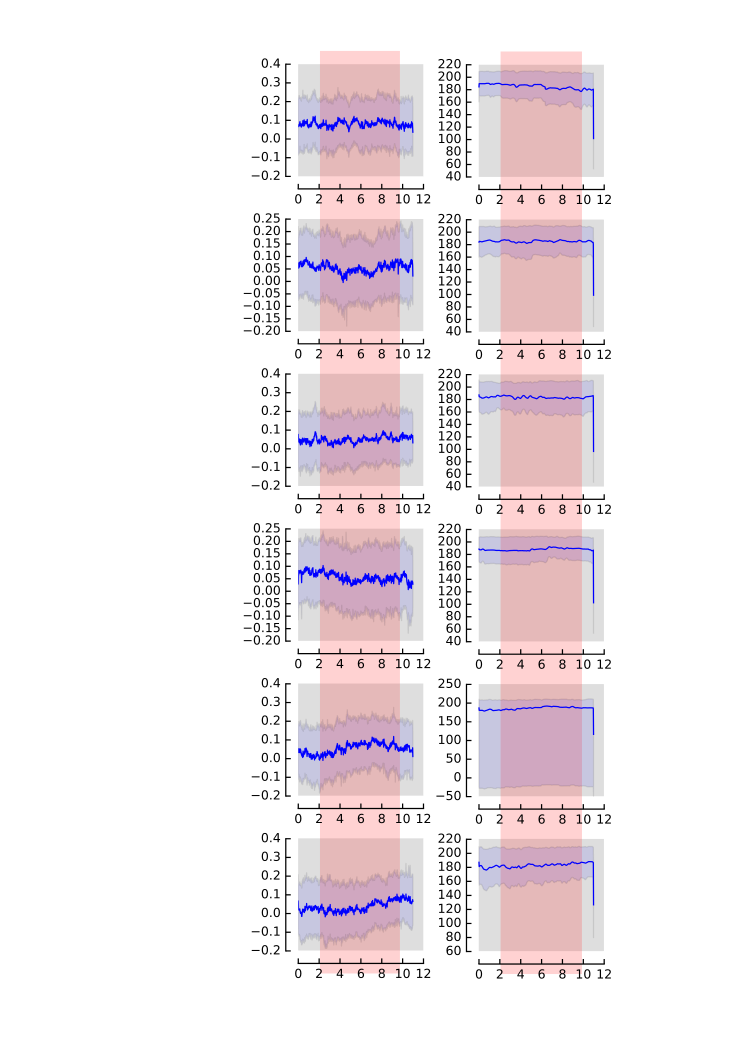

In [72]:
layout = fifi.FigureLayout('WSA_rot_matrx_layout.svg',make_mplfigures = True)

layout.axes['yaw_left'].plot(time, mean_WBA) #,'o',alpha = 0.2)
layout.axes['yaw_left'].fill_between(time, (mean_WBA-error/2), (mean_WBA + error/2),alpha = 0.1)

layout.axes['yaw_right'].plot(time, mean_WBA_yaw_right) #,'o',alpha = 0.2)
layout.axes['yaw_right'].fill_between(time, (mean_WBA_yaw_right-error_yaw_right/2), (mean_WBA_yaw_right + error_yaw_right/2),alpha = 0.1)

layout.axes['pitch_up'].plot(time, mean_WBA_pitch_up) #,'o',alpha = 0.2)
layout.axes['pitch_up'].fill_between(time, (mean_WBA_pitch_up-error_pitch_up/2), (mean_WBA_pitch_up + error_pitch_up/2),alpha = 0.1)

layout.axes['pitch_down'].plot(time, mean_WBA_pitch_down) #,'o',alpha = 0.2)
layout.axes['pitch_down'].fill_between(time, (mean_WBA_pitch_down-error_pitch_down/2), (mean_WBA_pitch_down + error_pitch_down/2),alpha = 0.1)

layout.axes['roll_cw'].plot(time, mean_WBA_roll_cw) #,'o',alpha = 0.2)
layout.axes['roll_cw'].fill_between(time, (mean_WBA_roll_cw-error_roll_cw/2), (mean_WBA_roll_cw + error_roll_cw/2),alpha = 0.1)

layout.axes['roll_ccw'].plot(time, mean_WBA_roll_ccw) #,'o',alpha = 0.2)
layout.axes['roll_ccw'].fill_between(time, (mean_WBA_roll_ccw-error_roll_ccw/2), (mean_WBA_roll_ccw + error_roll_ccw/2),alpha = 0.1)




layout.axes['yaw_left_wbf'].plot(time, mean_WBF_yaw_left) #,'o',alpha = 0.2)
layout.axes['yaw_left_wbf'].fill_between(time, (mean_WBF_yaw_left-error_WBF_yaw_left/2), (mean_WBF_yaw_left + error_WBF_yaw_left/2),alpha = 0.1)

layout.axes['yaw_right_wbf'].plot(time, mean_WBF_yaw_right) #,'o',alpha = 0.2)
layout.axes['yaw_right_wbf'].fill_between(time, (mean_WBF_yaw_right-error_WBF_yaw_right/2), (mean_WBF_yaw_right + error_WBF_yaw_right/2),alpha = 0.1)

layout.axes['pitch_up_wbf'].plot(time, mean_WBF_pitch_up) #,'o',alpha = 0.2)
layout.axes['pitch_up_wbf'].fill_between(time, (mean_WBF_pitch_up-error_WBF_pitch_up/2), (mean_WBF_pitch_up + error_WBF_pitch_up/2),alpha = 0.1)

layout.axes['pitch_down_wbf'].plot(time, mean_WBF_pitch_down) #,'o',alpha = 0.2)
layout.axes['pitch_down_wbf'].fill_between(time, (mean_WBF_pitch_down-error_WBF_pitch_down/2), (mean_WBF_pitch_down + error_WBF_pitch_down/2),alpha = 0.1)

layout.axes['roll_cw_wbf'].plot(time, mean_WBF_roll_cw) #,'o',alpha = 0.2)
layout.axes['roll_cw_wbf'].fill_between(time, (mean_WBA_roll_cw-error_WBF_roll_cw/2), (mean_WBF_roll_cw + error_WBF_roll_cw/2),alpha = 0.1)

layout.axes['roll_ccw_wbf'].plot(time, mean_WBF_roll_ccw) #,'o',alpha = 0.2)
layout.axes['roll_ccw_wbf'].fill_between(time, (mean_WBF_roll_ccw-error_WBF_roll_ccw/2), (mean_WBF_roll_ccw + error_WBF_roll_ccw/2),alpha = 0.1)





fifi.mpl_functions.set_spines(layout)
layout.save('WSA_rot_matrx.svg')
plt.close('all')
display(SVG('WSA_rot_matrx.svg'))